# Detecting Fake tweets 

**Introduction**

"Fake news" has become a well-known term over recent years. We define this concept as news stories that are incorrect, false. Meaning, the content is fabricated and sources, facts and quotes are unverifiable. These false stories can be used intentionally to confuse or mislead the reader. 
In recent days, fake news has a significant presence on social media. The reason for this is that on social media content can be spread easily, fast and widely. 

**Goal of the project**

The goal of this project is to distinguish fake news tweets from real news tweets. The work in this Notebook builds on the work of a group of IT students. They kick-started the projects by engineering some filters. Our team continued to engineer more features and uses these features in a predictive model to predict which tweets are fake and which are real. 

## Pre-processing steps

### The data set
Let's first import the packages we know we will need and load in the dataset to get an overview of what we have to work with.

In [1]:
#Loading in the packages
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob, Word, Blobber
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Loading in the dataset
df1 = pd.read_csv("tweets_labeled.csv")
df1.head(10)

,tweet_id,text,label
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0
5,1175456815674343424,'RT @kcResister: Warren: 'Congress is complici...,1
6,1180809117310623744,'RT @ShimonPro: A dozen current and former sta...,1
7,1179840318935576578,'RT @samstein: This is a bombshell that isn’t ...,1
8,1081722778125062144,'Planned Parenthood Erects Billboards Urging W...,0
9,1158761795739217921,'https://t.co/MvrznF1fWVWhoever obstructing th...,1


'tweet_id' is a variable we will not use in this project. The focus of the project is to extract features from the text of the tweets. However, later on, we will use this variable to merge all the data frames from my teammates and me.

## Engineering features

Engineering the features is part of the cleaning of the data. We will generate more variables from the text of the tweets in order to create filters that support fake news detection. 

### Features done by teammates
In this part, I will load in the results of the features of my teammates. Each of us has worked on features individually, but some features have been engineered twice. In those case, I choose the feature with the highest correlation. Because of this I removed doubled features to clean out the data frame I will work with when building the model.

#### 1. Features by Shania (Named: df2)

In [3]:
#Load in Shania's file.
df2 = pd.read_csv("df_shania.csv", engine="python")

In order to, later on, merge the data frames well I have to drop some columns that we have in common.

In [4]:
df2.drop("Unnamed: 0", axis=1, inplace=True) #Is already in the original data frame.
df2.drop("text", axis=1, inplace=True) #These are already in the original data frame, so I don't need to merge them.
df2.drop("label", axis=1, inplace=True) #These are already in the original data frame, so I don't need to merge them.
df2.head() #To get a look of the data frame.

,tweet_id,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,VERB,X,ref_count
0,1161040537207463936,3.0,1.0,2.0,0.0,1.0,4.0,11.0,0.0,0.0,1.0,4.0,0.0,0.0
1,1176360756239118342,6.0,3.0,1.0,3.0,0.0,1.0,9.0,0.0,0.0,1.0,2.0,0.0,2.0
2,1099036648573145088,5.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1092915693203480577,5.0,1.0,2.0,1.0,0.0,2.0,9.0,0.0,2.0,1.0,2.0,0.0,0.0
4,1149038450668187654,4.0,3.0,3.0,0.0,0.0,0.0,13.0,2.0,0.0,2.0,1.0,0.0,0.0


'.' = punctuation

In [5]:
df2.info() #To get more info on the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225425 entries, 0 to 225424
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tweet_id   225425 non-null  int64  
 1   .          225405 non-null  float64
 2   ADJ        225405 non-null  float64
 3   ADP        225405 non-null  float64
 4   ADV        225405 non-null  float64
 5   CONJ       225405 non-null  float64
 6   DET        225405 non-null  float64
 7   NOUN       225405 non-null  float64
 8   NUM        225405 non-null  float64
 9   PRON       225405 non-null  float64
 10  PRT        225405 non-null  float64
 11  VERB       225405 non-null  float64
 12  X          225385 non-null  float64
 13  ref_count  225385 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 24.1 MB


#### 2. Features by Ali (Named: df3)

In [6]:
#Load in Ali's file.
df3 = pd.read_csv("df_Ali_Labled_Including_feature_DF.csv", engine="python")

In order to, later on, merge the data frames well I have to drop some columns that we have in common. Aside from those, I need to drop columns that contain results of features that were already engineered by other teammates of which I received the files earlier. By removing these columns the final data frame will be clean without any overlapping features in it. 

In [7]:
df3.drop("text", axis=1, inplace=True) # the final file already contains a 'text'.
df3.drop("label", axis=1, inplace=True) #These are already in the original data frame, so I don't need to merge them.
df3.drop("text_org", axis=1, inplace=True) # the final file already contains a 'text'.
df3.drop("COUNT_DT", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_NNP", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VBD", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_NN", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_CC", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VBN", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_IN", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_JJ", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VBZ", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_TO", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VBG", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_RB", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VB", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_NNS", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_VBP", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_WRB", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_MD", axis=1, inplace=True) # has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_WP", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_PRP", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_NNPS", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_CD", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_WDT", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_PRP$", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_JJR", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_RBR", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_RP", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_EX", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_PDT", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_UH", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_FW", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_JJS", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_RBS", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_POS", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_WP$", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("COUNT_LS", axis=1, inplace=True)# has also been created by Shania and this one returns a NaN correlation.
df3.drop("count_mention", axis=1, inplace=True) # has also been created by me and contains the same values.
df3.drop("count_hashtag", axis=1, inplace=True) # has also been created by me and contains the same values.
df3.drop("contains_link", axis=1, inplace=True) # has also been created by Freek and contains the same values.
df3.drop("is_retweet", axis=1, inplace=True) # has also been created by Freek and contains the same values.
df3.drop("readability", axis=1, inplace=True) # has also been created by Freek and that one returns a higher correlation.

In [8]:
df3.head() #To get a look of the data frame.

,contains_hashtag,count_link,contains_mention,count_3dots,count_capital_letters,count_capital_letters_to_length,count_stop_words,count_special_chars,count_digits,count_alphabets,...,is_positive,is_negative,is_neutral,count_positive_freq_words,count_negative_freq_words,count_negative_freq_bigrams,count_positive_freq_bigrams,ac_length,ac_words_count,tweet_id
0,0.0,0.0,1.0,1.0,11.0,0.078014,7.0,28.0,0.0,113.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,21.0,1.161041e+18
1,0.0,0.0,1.0,1.0,8.0,0.057143,1.0,32.0,0.0,108.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,111.0,17.0,1.176361e+18
2,1.0,1.0,1.0,0.0,16.0,0.213333,0.0,16.0,1.0,58.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,2.0,1.099037e+18
3,0.0,1.0,1.0,0.0,23.0,0.203540,6.0,27.0,3.0,83.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,13.0,1.092916e+18
4,0.0,1.0,1.0,1.0,24.0,0.169014,0.0,34.0,9.0,99.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0,16.0,1.149038e+18


In [9]:
df3.info() #Get more info on the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225425 entries, 0 to 225424
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   contains_hashtag                 225405 non-null  float64
 1   count_link                       225405 non-null  float64
 2   contains_mention                 225405 non-null  float64
 3   count_3dots                      225405 non-null  float64
 4   count_capital_letters            225405 non-null  float64
 5   count_capital_letters_to_length  225405 non-null  float64
 6   count_stop_words                 225405 non-null  float64
 7   count_special_chars              225405 non-null  float64
 8   count_digits                     225405 non-null  float64
 9   count_alphabets                  225405 non-null  float64
 10  bc_length                        225405 non-null  float64
 11  bc_words_count                   225405 non-null  float64
 12  bc

**DISCLAIMER**

I encountered a limitation when I tried to add Ali's features to my Notebook. His file contains tweet IDs that are not correct and therefore not in line with the tweet IDs of the other members of our team. This problem drew my attention very last minute. Aside from that, his index did not correspond with the index of the teammates and original dataset. After failing to get a new file with correct tweet IDs and trying to fix the problem with Shania, I decided to not merge Ali's data frame with the others. 

#### 3. Features by Freek (Named: df4)

In [10]:
#Load in Freek's file.
df4 = pd.read_csv("df_labeled_including_features_freek.csv", engine="python")

Here again, I removed overlapping features from Freek's data frame. He had merged Shania and my features already since we had them done early on. However, he hadn't removed them from his .csv file. That's why I will drop the columns containing double features.

In [11]:
df4.drop("Unnamed: 0", axis=1, inplace=True) #Is already in the original data frame.
df4.drop("text", axis=1, inplace=True) #Is already in the original data frame.
df4.drop("clean_text", axis=1, inplace=True) #Is already in the original data frame.
df4.drop("label", axis=1, inplace=True) #These are already in the original data frame, so I don't need to merge them.
df4.drop(".", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("ADJ", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("ADP", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("ADV", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("CONJ", axis=1, inplace=True)# This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("DET", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("NOUN", axis=1, inplace=True)# This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("NUM", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("PRON", axis=1, inplace=True)# This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("PRT", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("VERB", axis=1, inplace=True)# This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("X", axis=1, inplace=True) # This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("ref_count", axis=1, inplace=True)# This feature has been created by Shania, but Freek had already merged her features in his data frame.
df4.drop("stopwords", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("mentions", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("char_count", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("hashtags", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("word_count", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("capital_count", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("average_word_length", axis=1, inplace=True) # This feature has been created by me, but Freek had already merged my features.
df4.drop("compound", axis=1, inplace=True) #This feature is created by my, but Feek already merged it with his own features.
df4.drop("neg", axis=1, inplace=True)#This feature is created by my, but Feek already merged it with his own features.
df4.drop("neu", axis=1, inplace=True)#This feature is created by my, but Feek already merged it with his own features.
df4.drop("pos", axis=1, inplace=True)#This feature is created by my, but Feek already merged it with his own features.
df4.drop("sentiment_textblob", axis=1, inplace=True)#This feature is created by my, but Feek already merged it with his own features.

In [12]:
df4.head() #To get a look of the data frame.

,tweet_id,extreme_Vader,extreme_textblob,sentiment_AFINN_SentStrength,extreme_AFINN_SentStrength,sentiment_ANEW,extreme_ANEW,extreme_combined,flesch_grade,longest_word,contains_link,check_for_numbers,amount_of_numbers,percentage_use,RT
0,1161040537207463936,0,0,2,0,0.0,0,0,68.26,10,0,0,0,0,1
1,1176360756239118342,1,0,4,1,0.0,0,2,26.81,11,0,0,0,0,1
2,1099036648573145088,0,0,0,0,0.0,0,0,-52.05,13,1,0,0,0,1
3,1092915693203480577,0,0,0,0,0.0,0,0,54.90,7,1,0,0,0,1
4,1149038450668187654,0,0,-2,0,0.0,0,0,42.72,9,1,1,7,1,1


In [13]:
df4.info() #Get more info on the data frame. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225365 entries, 0 to 225364
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tweet_id                      225365 non-null  int64  
 1   extreme_Vader                 225365 non-null  int64  
 2   extreme_textblob              225365 non-null  int64  
 3   sentiment_AFINN_SentStrength  225365 non-null  int64  
 4   extreme_AFINN_SentStrength    225365 non-null  int64  
 5   sentiment_ANEW                225365 non-null  float64
 6   extreme_ANEW                  225365 non-null  int64  
 7   extreme_combined              225365 non-null  int64  
 8   flesch_grade                  225365 non-null  float64
 9   longest_word                  225365 non-null  int64  
 10  contains_link                 225365 non-null  int64  
 11  check_for_numbers             225365 non-null  int64  
 12  amount_of_numbers             225365 non-nul

#### 4. Features by Mina (Named: df5)

In [14]:
df5 = pd.read_csv("df_MinaDF.csv", engine="python")

In order to, later on, merge the data frames well I have to drop some columns that we have in common and features that are already done. Aside from that, I also dropped her 'target' because it is the same as 'label' and her column with the results of her model evaluation.

In [15]:
df5.drop("Unnamed: 0", axis=1, inplace=True) # contains an unnamed column.
df5.drop("text", axis=1, inplace=True) # Is already in the original data frame.
df5.drop("flesch_readability_grade", axis=1, inplace=True) # has also been created by Freek and that one returns a higher correlation.
df5.drop("mention_count", axis=1, inplace=True) # This feature has already been created by me and that mine returns a higher correlation.
df5.drop("char_count", axis=1, inplace=True)# I already created this features.
df5.drop("target", axis=1, inplace=True)# same as 'label'.
df5.drop("model_output", axis=1, inplace=True)# this is a result of her evaluation of the model.

In [16]:
df5.head() #To get a look of the dataframe.

,tweet_id,words_only_count
0,1161040537207463936,14
1,1176360756239118342,17
2,1099036648573145088,2
3,1092915693203480577,7
4,1149038450668187654,16


In [17]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   tweet_id          225405 non-null  int64
 1   words_only_count  225405 non-null  int64
dtypes: int64(2)
memory usage: 3.4 MB


#### 5. Features by Yuan (Named: df6)

In [18]:
#Load in Yuan's file.
df6 = pd.read_csv("features_yuan.csv", engine="python")

Yuan's file overlapped for a big part with Shania's PoS tagging features. Aside from that, we had many columns containing zeros. Instead of dropping those columns, I decided to select the columns that are useful and add the tweet ID's from the original dataset because she had accidentally removed them when she exported the .csv file.

In [19]:
original_df = pd.read_csv("tweets_labeled.csv", engine='python') 
original_df = original_df[["tweet_id"]] # this shows the head of the data frame in the output 
df6 = pd.merge(original_df, df6, left_index=True, right_index=True)
df6 = df6[["tweet_id", "Yuan_Feature_1", "Yuan_Feature_2"]] # The following features have been selected because these don't return a NaN correlation.
df6.head() #To get a look of the data frame.

,tweet_id,Yuan_Feature_1,Yuan_Feature_2
0,1161040537207463936,1.000000e+00,1.000000e+00
1,1176360756239118342,1.000000e+00,1.000000e+00
2,1099036648573145088,1.364385e-07,2.925688e-04
3,1092915693203480577,7.986062e-04,8.133333e-01
4,1149038450668187654,6.179312e-14,7.841145e-31


In [20]:
df6.info() #Get more info on the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tweet_id        225405 non-null  int64  
 1   Yuan_Feature_1  225405 non-null  float64
 2   Yuan_Feature_2  225405 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.2 MB


### Merging the dataframes

In [21]:
df = df1.merge(df2, on='tweet_id')
#df = df.merge(df3, on='tweet_id') #I am unable to merge Ali's file because of a mistake in his tweet id and the lack of another overlapping column. 
df = df.merge(df4, on='tweet_id')
df = df.merge(df5, on='tweet_id')
df = df.merge(df6, on='tweet_id')

In [22]:
df.head() #To get a look of the data frame.

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,...,flesch_grade,longest_word,contains_link,check_for_numbers,amount_of_numbers,percentage_use,RT,words_only_count,Yuan_Feature_1,Yuan_Feature_2
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3.0,1.0,2.0,0.0,1.0,4.0,11.0,...,68.26,10,0,0,0,0,1,14,1.000000e+00,1.000000e+00
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6.0,3.0,1.0,3.0,0.0,1.0,9.0,...,26.81,11,0,0,0,0,1,17,1.000000e+00,1.000000e+00
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5.0,1.0,0.0,0.0,0.0,0.0,5.0,...,-52.05,13,1,0,0,0,1,2,1.364385e-07,2.925688e-04
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5.0,1.0,2.0,1.0,0.0,2.0,9.0,...,54.90,7,1,0,0,0,1,7,7.986062e-04,8.133333e-01
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4.0,3.0,3.0,0.0,0.0,0.0,13.0,...,42.72,9,1,1,7,1,1,16,6.179312e-14,7.841145e-31


After merging the features of my teammates I will add my own features to the data frame below. 

### My own features

**1. Feature that counts the words in a tweet**

The first feature that came to mind was to extract the total number of words in each tweet. My hypothesis behind this is that negative sentiments contain fewer amounts of words than positive ones. Aside from that, this features helps us get extra information from our data.

This feature was created by using the split function:

In [23]:
def show_word_count(df):
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
    return df[['text','word_count']].head() #To have a look at the results.

In [24]:
show_word_count(df) #shows word count per tweet

,text,word_count
0,'RT @SenJeffMerkley: The Endangered Species Ac...,23
1,'RT @LindseyGrahamSC: Interesting concept -- i...,22
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,6
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,16
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,20


**2. Feature for counting characters**

This feature is based on the thought of the previous one. By cutting the tweet text up in pieces (such as word count and character count) we retrieve more information about the tweet. 

With this feature, we calculate the amount of character that each tweet contains. This number also includes spaces.

In [25]:
def show_char_count(df):
    df['char_count'] = df['text'].str.len() #This includes spaces as well.
    return df[['text','char_count']].head() #To have a look at the results.

In [26]:
show_char_count(df)

,text,char_count
0,'RT @SenJeffMerkley: The Endangered Species Ac...,141
1,'RT @LindseyGrahamSC: Interesting concept -- i...,140
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,75
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,113
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,142


**3. Feature to retrieve the average word length**

Here, we create a feature that calculates what the average length of words each tweet contains. To do so, we take the sum of the length of all the words in that tweet and divide that number by the total length of the tweet.

In [27]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head() #To have a look at the results.

,text,avg_word
0,'RT @SenJeffMerkley: The Endangered Species Ac...,5.173913
1,'RT @LindseyGrahamSC: Interesting concept -- i...,5.950000
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,14.000000
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,6.125000
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,6.150000


**4. Number of stopwords**

The next feature revolves around stopwords. To get some extra information about the texts of the tweets we retrieve the number of stopwords per tweet. Fake news tweets tend to have a higher amount of stopwords (Al-Ash & Wibowo, 2018). 
First, we need to import the English stopwords from NLTK, which is a Natural Language Processing library for Python.

In [28]:
def stopwords_count(df):
    stop = stopwords.words('english')
    df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
    return df[['text','stopwords']].head()

stopwords_count(df)

,text,stopwords
0,'RT @SenJeffMerkley: The Endangered Species Ac...,7
1,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,4
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,0


**5. Count of words in UPPERCASE**

This next feature counts how often uppercase words occur in a tweet. Usually, people online use caps lock when expressing anger or frustration in textual form (Robb, 2014). So to detect which tweets contain words written in uppercase I added this next feature.

In [29]:
def UPPER_words_count(df):
    df['count_words_upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    return df[['text','count_words_upper']].head()

UPPER_words_count(df)

,text,count_words_upper
0,'RT @SenJeffMerkley: The Endangered Species Ac...,1
1,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,1
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,3
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,1


**6. Count of special characters (Hashtags & Mentions)**

To extract the number of special characters used in each tweet, we can create new functions that do the job. For example, the usage of hashtags or the mentions can be counted. This helps us get extra information from our data. Tweets with false information generally contain multiple hashtags (Chong, 2019). 

To retrieve the hashtags and mentions we use the 'starts with' function because these special characters used for hashtags(#) and mentions(@) are always at the beginning of a word. 

In [30]:
def count_hashtags(df):
    df['hashtags'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
    return df[['text','hashtags']].head()

count_hashtags(df)

,text,hashtags
0,'RT @SenJeffMerkley: The Endangered Species Ac...,0
1,'RT @LindseyGrahamSC: Interesting concept -- i...,0
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,2
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,0


**Mentions**

Tweets with a high number of mentions indicate high Twitter activity (Espinosa, Centeno, & Rodrigo, 2020). The writer probably wants many people to see it. I hypothesise that tweets with several mentions are more likely to be fake. 

In [31]:
def count_mentions(df):
    df['mentions'] = df['text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
    return df[['text','mentions']].head()

count_mentions(df)

,text,mentions
0,'RT @SenJeffMerkley: The Endangered Species Ac...,1
1,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,1
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,1
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,1


**7. Sentiment Analysis Textblob**

Sentiment analysis determines the emotional value of textual data. It has been applied in many domains, including analysis of tweet sentiment. 

TextBlob is a library for Python that processes textual data. It offers an API to perform common natural language processing (NLP) tasks (TextBlob, n.d.). 

In [32]:
def SentimentTextBlob(df):
    df['text'][:5].apply(lambda x: TextBlob(x).sentiment)
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
    return df[['text','sentiment']].head()

SentimentTextBlob(df)

,text,sentiment
0,'RT @SenJeffMerkley: The Endangered Species Ac...,0.00
1,'RT @LindseyGrahamSC: Interesting concept -- i...,0.25
2,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0.00
3,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0.00
4,'RT @TheOnion: Sweden Announces Plan To Get 10...,0.00


If the value is nearer to 1, it indicates positive sentiment.

If the value is nearer to -1, it indicates negative sentiment.

**8. Sentiment Analysis VADER**

VADER algorithm outputs sentiment scores in 4 classes:

1. neg: Negative
2. neu: Neutral
3. pos: Positive
4. compound: Compound (i.e. aggregated score)

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive) (Pandey, 2020).


In [33]:
analyzer = SentimentIntensityAnalyzer()

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sashabunink/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
text = df['text']

In [36]:
def Vader_sent(df):
    df['VADER_compound_score'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]
    df['VADER_neg_score'] = [analyzer.polarity_scores(x)['neg'] for x in df['text']]
    df['VADER_neu_score'] = [analyzer.polarity_scores(x)['neu'] for x in df['text']]
    df['VADER_pos_score'] = [analyzer.polarity_scores(x)['pos'] for x in df['text']]
    return df.head()

Vader_sent(df)

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3.0,1.0,2.0,0.0,1.0,4.0,11.0,...,5.173913,7,1,0,1,0.00,0.4215,0.0,0.882,0.118
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6.0,3.0,1.0,3.0,0.0,1.0,9.0,...,5.950000,1,1,0,1,0.25,0.6369,0.0,0.766,0.234
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5.0,1.0,0.0,0.0,0.0,0.0,5.0,...,14.000000,0,1,2,1,0.00,0.0000,0.0,1.000,0.000
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5.0,1.0,2.0,1.0,0.0,2.0,9.0,...,6.125000,4,3,0,1,0.00,0.0000,0.0,1.000,0.000
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4.0,3.0,3.0,0.0,0.0,0.0,13.0,...,6.150000,0,1,0,1,0.00,0.2732,0.0,0.900,0.100


In [37]:
#To get an overview of all the variables currently in our dataset
df.head()

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3.0,1.0,2.0,0.0,1.0,4.0,11.0,...,5.173913,7,1,0,1,0.00,0.4215,0.0,0.882,0.118
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6.0,3.0,1.0,3.0,0.0,1.0,9.0,...,5.950000,1,1,0,1,0.25,0.6369,0.0,0.766,0.234
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5.0,1.0,0.0,0.0,0.0,0.0,5.0,...,14.000000,0,1,2,1,0.00,0.0000,0.0,1.000,0.000
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5.0,1.0,2.0,1.0,0.0,2.0,9.0,...,6.125000,4,3,0,1,0.00,0.0000,0.0,1.000,0.000
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4.0,3.0,3.0,0.0,0.0,0.0,13.0,...,6.150000,0,1,0,1,0.00,0.2732,0.0,0.900,0.100


In [38]:
df.info() #To get more info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225365 entries, 0 to 225364
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tweet_id                      225365 non-null  int64  
 1   text                          225365 non-null  object 
 2   label                         225365 non-null  int64  
 3   .                             225365 non-null  float64
 4   ADJ                           225365 non-null  float64
 5   ADP                           225365 non-null  float64
 6   ADV                           225365 non-null  float64
 7   CONJ                          225365 non-null  float64
 8   DET                           225365 non-null  float64
 9   NOUN                          225365 non-null  float64
 10  NUM                           225365 non-null  float64
 11  PRON                          225365 non-null  float64
 12  PRT                           225365 non-nul

## Descriptive analysis

In this part, I will analyse the outcome of my features. To do so, I will visualize the distribution of the data. 

**1. Word count**

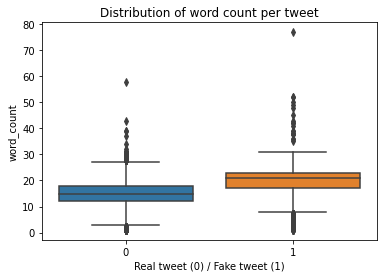

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.
sns.boxplot(x='label', y='word_count', data=df)
plt.title('Distribution of word count per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

I choose a boxplot, because it visualizes the distribution of the variable on an interval scale and shows outliers.

**What I see**

What is visible from this plot is that, generally, fake tweets seem to contain more words than real tweets. 

#### 2. Character count

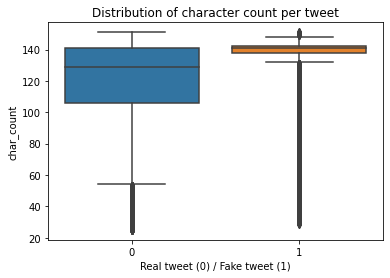

In [40]:
sns.boxplot(x='label', y='char_count', data=df)
plt.title('Distribution of character count per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

From this plot, I see that the range between the lower quartile and upper quartile are much closer for the fake news tweets than for the real tweets. 

The majority of the fake news tweets tend to have a character amount of approximately 140. Whereas, the real tweets, generally, vary more in the number of characters. 

**3. Average word length**

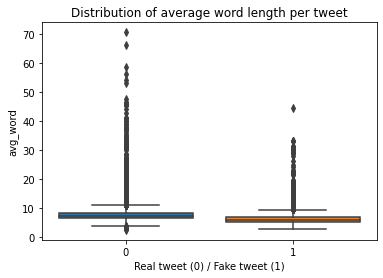

In [41]:
sns.boxplot(x='label', y='avg_word', data=df)
plt.title('Distribution of average word length per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

It seems like real tweets contain longer words than fake news tweets.  You can see that by the range of outliers on the blue boxplot (real tweets) and the range between its minimum and maximum. 
The average length of a word in a real tweet seems to, generally, be between 7 and 8 characters. Whereas the fake news tweets seem to, generally, be ranging between 6 and 7 characters. 

**4. Number of stopwords**

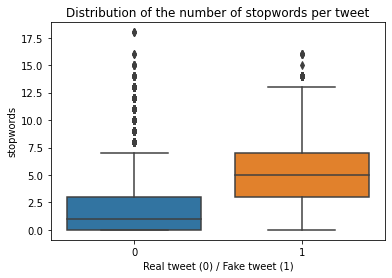

In [42]:
sns.boxplot(x='label', y='stopwords', data=df)
plt.title('Distribution of the number of stopwords per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

It seems like, overall, the fake tweets contain more stopwords than real tweets. However, the real tweets have more outliers and the highest outlier (18 stopwords). But generally speaking, real tweets seem to contain fewer stopwords than fake tweets based on the distribution of this visualization.

**5. Amount of words in UPPERCASE**

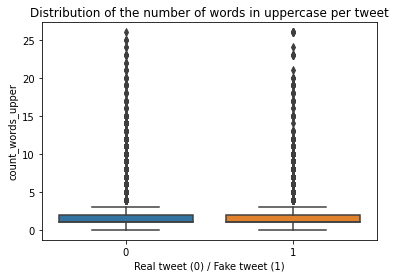

In [43]:
sns.boxplot(x='label', y='count_words_upper', data=df)
plt.title('Distribution of the number of words in uppercase per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

The boxplots seem to be almost identical. The difference is in the outliers. Generally speaking, you can conclude that the number of words in uppercase is the same. This feature will not make much of a difference.

**6a. Special characters - Hashtags**

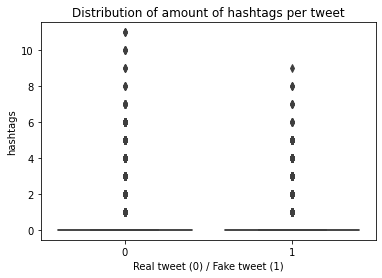

In [44]:
sns.boxplot(x='label', y='hashtags', data=df)
plt.title('Distribution of amount of hashtags per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

Generally speaking, the amount of hashtags in tweets is quite 'low'. However, the real tweets seem to have a higher number of outliers than the fake news tweets. The majority of both category tweets tend to not contain hashtags as the median and both quartiles are set at 0. 

**6b. Special characters - Mentions**

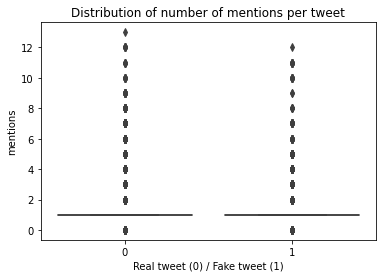

In [45]:
sns.boxplot(x='label', y='mentions', data=df)
plt.title('Distribution of number of mentions per tweet')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

Here, we see another faint distribution. The majority of the mentions in both categories is the same, however, the real tweets contain a little more outliers. So, maybe real tweets tend to differ more in amount of mentions per tweet.

**7. Sentiment analysis TextBlob**

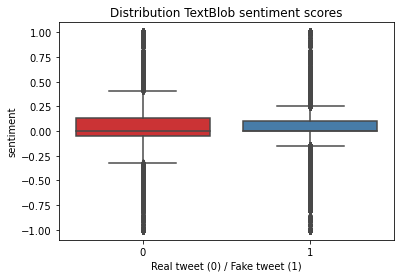

In [46]:
sns.boxplot(x='label', y='sentiment', data=df, palette='Set1')
plt.title('Distribution TextBlob sentiment scores')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

Here, the interquartile range (IQR) of the real tweets is greater than the IQR of the fake tweets. It seems that the sentiment of real tweets differs more than the sentiment of fake tweets. The general sentiment of the fake tweets is more centred around a neutral/positive score than the real tweets. 

- Real tweets: min = ±-0.28, Q1 = ±-0.08, median = 0.00, Q3 = ±0.13, max = ±0.39
- Fake tweets: min = ±-0.17, Q1 = ±0.00, Q3 = ±0.09, max = ±0.25

**8. Sentiment analysis VADER**

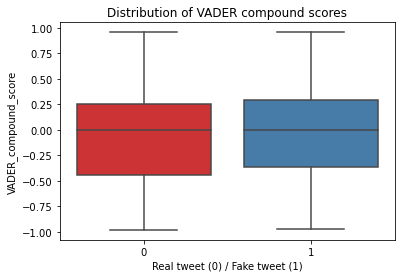

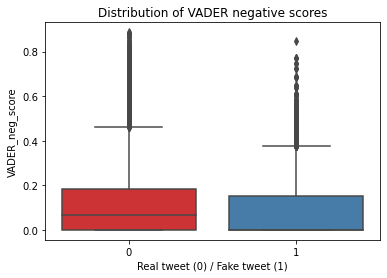

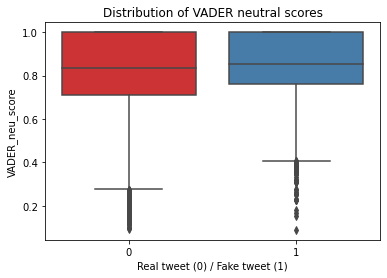

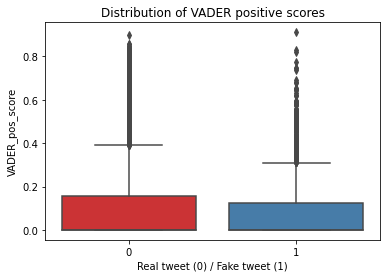

In [47]:
sns.boxplot(x='label', y='VADER_compound_score', data=df, palette='Set1')
plt.title('Distribution of VADER compound scores')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

sns.boxplot(x='label', y='VADER_neg_score', data=df, palette='Set1')
plt.title('Distribution of VADER negative scores')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

sns.boxplot(x='label', y='VADER_neu_score', data=df, palette='Set1')
plt.title('Distribution of VADER neutral scores')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

sns.boxplot(x='label', y='VADER_pos_score', data=df, palette='Set1')
plt.title('Distribution of VADER positive scores')
plt.xlabel('Real tweet (0) / Fake tweet (1)')
plt.show()

**What I see**

**The compound score** 

The compound score tells us whether the text of a tweet is leaning more towards a positive, neutral or negative sentiment. The first plot showing the distribution of the compound scores of the tweets seem to tell us that real tweets tend to lean more towards negative scores than fake tweets. 

- Real tweets: min = ±-0.98, Q1 = ±-0.42, Q3 = ±0.25, max = ±0.98
- Fake tweets: min = ±-0.98, Q1 = ±-0.33, Q3 = ±0.27, max = ±0.98

The median (middle value) is the same (0.00), but the range between the upper- and lower quartile is bigger for the real tweets. The upper quartile of the fake tweets (±0.27) is higher than the upper quartile of the real tweets (0.25), which indicates that the fake tweets tend to lean more towards a positive score than the fake tweets. 

**Negative score**

By looking at the size of the box (interquartile range(IQR)), the maximum and the outliers, it seems that the real tweets tend to have a higher negative score compared to the fake news tweets. 

- Real tweets: Q1 = 0.00, Q3 = ±0.19, max = ±0.45, greatest outlier = ±0.88
- Fake tweets: Q1 = 0.00, Q3 = ±0.17, max = ±0.38, greatest outlier = ±0.82

**Neutral score**

The real tweets seem to have a bigger range in neutral score than the fake tweets. However, the fake tweets seem to have more outliers. The outliers indicate that more data are numerically distant from the rest of the data. The middle values of the real tweets are more spread out (the interquartile range (IQR) is bigger than the IQR of the fake tweets). 

- Real tweets: min = ±0.3, Q1 = 0.71, Q3 = ±1.00, greatest outlier = ±0.02
- Fake tweets: min = ±0.42, Q1 = 0.75, Q3 = ±1.00, greatest outlier = ±0.02

**Positive score**

The interquartile range (IQR) of the real tweets in this distribution is bigger than the IQR of the fake tweets. Which means that the real tweets have a greater range of positive scores, however, the negative tweets have the greatest outlier. But generally, the real tweets seem to be more positive than the fake tweets.

- Real tweets: Q1 = 0.00, Q3 = ±0.16, max = 0.4, greatest outlier = ±0.88
- Fake tweets: Q1 = 0.00, Q3 = ±0.12, max = 0.3, greatest outlier = ±0.88

## Selecting variables

#### Heatmap for correlation
Now that we have our features, I would like to see which variables are correlating with our dependent variable: 'label'. To do so we are calculating the correlation and visualizing it in a heatmap.

In [48]:
corr_final = df.corr() #Leaving out the corrected variables (divided by a million)

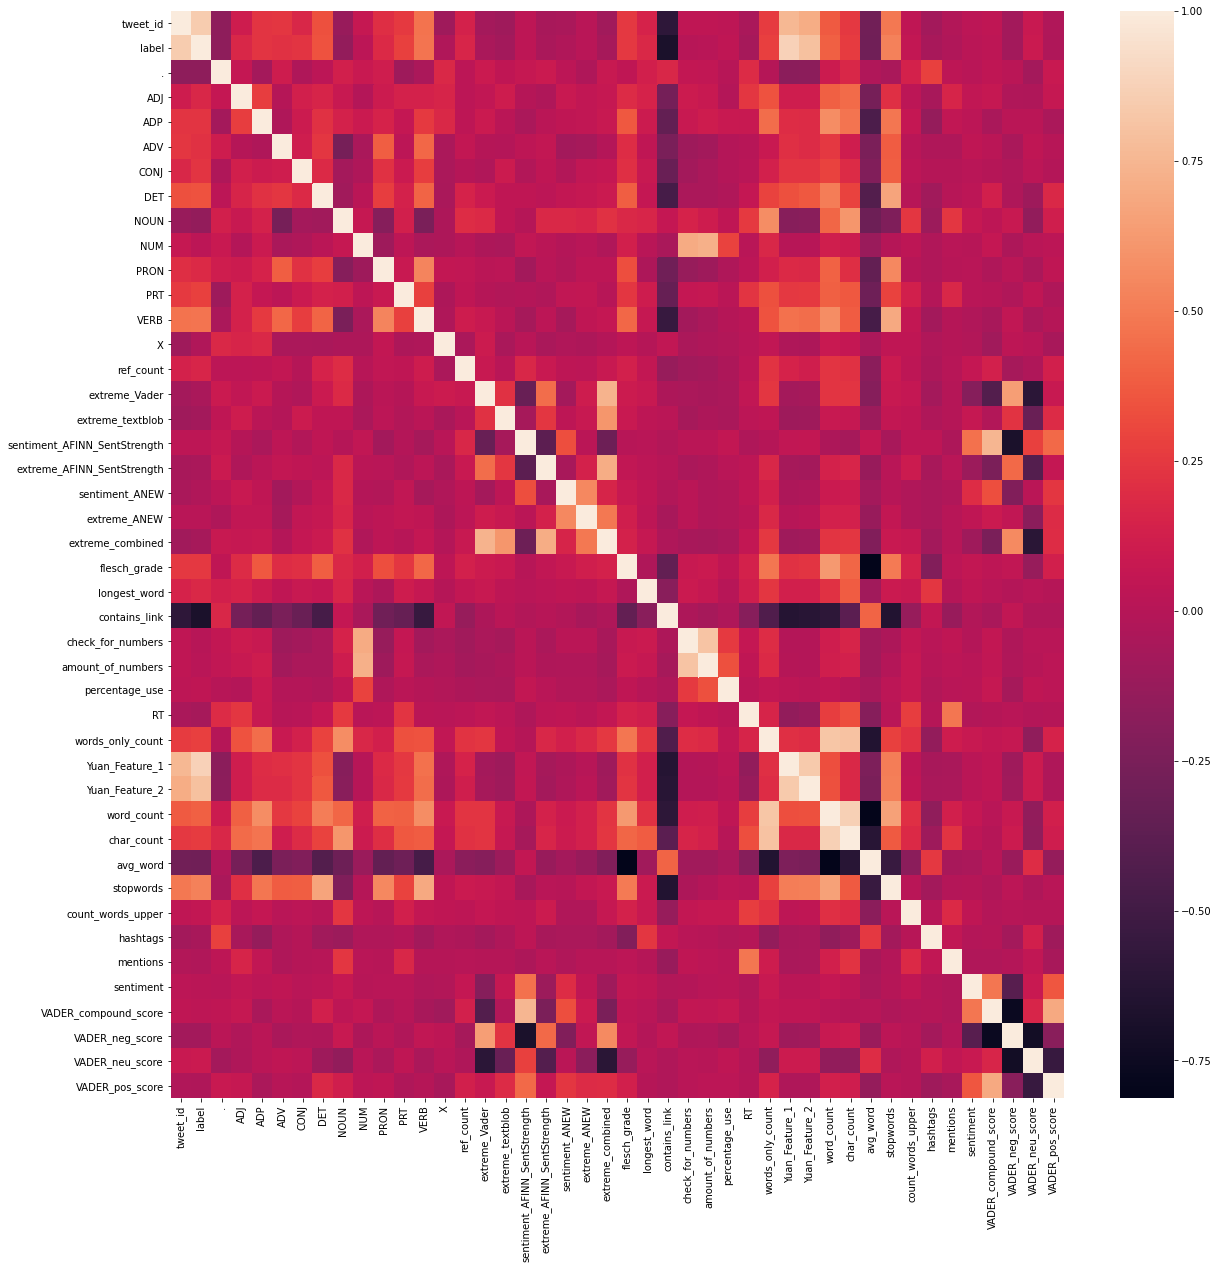

,tweet_id,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
tweet_id,1.000000,0.847390,-0.163028,0.103081,0.234063,0.239160,0.169344,0.339408,-0.119842,0.066969,...,-0.282183,0.487230,0.039203,-0.079441,-0.015120,0.023435,0.040523,-0.076315,0.079650,-0.020959
label,0.847390,1.000000,-0.165666,0.164994,0.232653,0.218686,0.232998,0.346407,-0.140138,0.028247,...,-0.289807,0.521412,0.053594,-0.055979,-0.022321,0.016798,0.032837,-0.081514,0.089952,-0.029315
.,-0.163028,-0.165666,1.000000,0.063756,-0.075598,0.107459,-0.028941,0.025248,0.127272,0.085766,...,-0.026635,-0.053064,0.138017,0.279066,0.033250,0.014850,0.037639,0.020974,-0.074757,0.080792
ADJ,0.103081,0.164994,0.063756,1.000000,0.270369,-0.000309,0.123938,0.151611,0.074635,-0.005633,...,-0.260543,0.207032,0.027623,-0.056912,0.150631,0.050153,0.067772,-0.023089,-0.029865,0.070351
ADP,0.234063,0.232653,-0.075598,0.270369,1.000000,-0.032331,0.099084,0.214156,0.142333,0.088521,...,-0.447790,0.476168,0.060620,-0.133512,0.049255,0.027017,-0.053340,0.018619,0.015812,-0.044954
ADV,0.239160,0.218686,0.107459,-0.000309,-0.032331,1.000000,0.109138,0.240792,-0.267403,-0.050798,...,-0.239423,0.383053,0.014145,-0.030450,-0.032232,0.043562,0.022220,-0.053222,0.041280,0.005734
CONJ,0.169344,0.232998,-0.028941,0.123938,0.099084,0.109138,1.000000,0.179159,-0.070243,-0.031151,...,-0.218988,0.390984,0.025961,0.001501,0.000701,0.013236,-0.002576,-0.023302,0.027269,-0.010427
DET,0.339408,0.346407,0.025248,0.151611,0.214156,0.240792,0.179159,1.000000,-0.089014,0.018706,...,-0.420081,0.668284,0.003574,-0.088690,0.002417,0.029328,0.128439,-0.031857,-0.097645,0.177349
NOUN,-0.119842,-0.140138,0.127272,0.074635,0.142333,-0.267403,-0.070243,-0.089014,1.000000,0.066993,...,-0.306137,-0.229884,0.237104,-0.105150,0.237804,0.070361,0.031069,0.078663,-0.150561,0.118873
NUM,0.066969,0.028247,0.085766,-0.005633,0.088521,-0.050798,-0.031151,0.018706,0.066993,1.000000,...,-0.116689,0.000790,0.030572,-0.020695,0.012348,0.005478,0.061275,-0.034174,0.011860,0.024276


In [49]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr_final, xticklabels=corr_final.columns, yticklabels=corr_final.columns, ax=ax)
plt.show()
corr_final

**What I see**

When looking at the heatmap I notice that the following variables correlate with the dependent variable:

- contains_link = -0.681918
- VERB = 0.470821
- Yuan_Feature_1 = 0.873240 
- Yuan_Feature_2 = 0.798350
- word_count = 0.396130
- avg_word = -0.289807
- stopwords = 0.521412 	

Since we have enough data, we can include all variables. Nevertheless, it is interesting to see which variables seem to be correlating the strongest. 

## Predicting with K-nearest neighbor
In this part I will use the k-NN algorithm to predict fake tweets in our dataset.

K-nearest naighbor (KNN) is a supervised machine learning algorithm that can be used for both classification and regression predictions, but is mostly used for classification. Superviced machine learning relies on labeled input data to learn from. 

KNN makes the assumption that similar things are in close proximity. So, it classifies data points based on the points that are most similar to it (Zhang, 2016). 

From a dataset, the algorithm selects the _k_-nearest neighbor (Example: k=3). of the variable you want to predict. 

For classification, it will pick the most frequent answer. 
For regression, it will take the mean of the neighbors.  

**Advantages of KNN:** it is easy to use and the calculation time is quick.

**Disadvantages of KNN:** its accuracy depends on the quality of the data and you must find the best _k_ value yourself (Schott, 2020). 

In [50]:
#Importing packages for Knn
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

**Value counts of 'label'**

Let's have a look at the variable 'label' which we are going to predict.

In [51]:
df['label'].value_counts()

0    153453
1     71912
Name: label, dtype: int64

1 means 'Fake tweet' and 0 identifies an actual/real tweet. As we can see, 71912 tweets are labeled as 'fake' in this dataset. Let's try the KNN-algorithm.

### Building the model
Now I will build the model. 

In [52]:
X = df.loc[:,'.':'VADER_pos_score'] #create the X matrix

y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
54708,1.0,4.0,1.0,0.0,0.0,0.0,8.0,0.0,1.0,3.0,...,7.937500,2,1,0,1,0.000000,0.0000,0.000,1.000,0.000
217368,5.0,2.0,2.0,0.0,0.0,0.0,7.0,2.0,0.0,1.0,...,7.461538,2,1,0,1,0.000000,0.0000,0.000,1.000,0.000
136921,7.0,2.0,3.0,3.0,0.0,1.0,8.0,0.0,3.0,3.0,...,5.130435,9,1,2,1,0.780000,0.3612,0.000,0.894,0.106
41831,6.0,4.0,4.0,0.0,0.0,0.0,9.0,0.0,1.0,1.0,...,6.315789,4,2,0,1,-0.033333,-0.4981,0.152,0.848,0.000
161694,6.0,2.0,1.0,0.0,0.0,1.0,10.0,1.0,0.0,1.0,...,6.437500,2,2,0,1,-0.031818,0.0000,0.000,1.000,0.000


I will now use the _KNeighborsClassifier_ class from sklearn.

In [53]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

### Model Evaluation
We will start the evaluation by calculating the accuracy. As usual, we do that on the test data.

In [54]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.9613074988906967

**Accuracy**

96% of the tweets are predicted accurately. 

Let's now create the confusion matrix to evaluate the precision and recall.

In [55]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[44546,  1366],
       [ 1250, 20448]])

How do I know which row is which 'real' of 'fake'? There's an attribute for that in our model:

In [56]:
knn.classes_

array([0, 1])

This tells us that the variable 'label' has two outcomes. We know from the documentation that "0" means real tweet, "1" means fake news tweet. 

To make it easier to read, we can make a better table out of it.

In [57]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['Real', 'Fake'], columns = ['Real_p', 'Fake_p']) 
conf_matrix

,Real_p,Fake_p
Real,44546,1366
Fake,1250,20448


The matrix shows that of the fake tweets, 20448 are correctly predicted to be fake. 1250 fake tweets are incorrectly predicted as 'real'. 

The recall and precision for the category 'fake' is:

$recall = \frac{20448}{20448 + 1250} = .942$

$precision = \frac{20448}{20448 + 1366} = .937$

### Quick check

Just to check we are going to calculate the accuracy (eventhough we already did that with the .score method).

**Accuracy**

In [58]:
(44546+20448)/(44546+1366+1250+20448)

0.9613074988906967

The accuracy is correct. It's about 96%.

**precision (fake tweets)**

The precision in this case is the number of correctly predicted fake tweets, devided by the total number of predicted fake tweets. 

In [59]:
20448/(20448+1366)

0.9373796644356835

**Recall (fake tweets)**

This is the number of correctly predicted fake tweets, divided by the total number of actual tweets. 

In [60]:
20448/(20448+1250)

0.9423910037791502

### Parameter setting
Finally, we are going to create a classification report to see what outcome our model would give with a different setting for the most important parameter: k. I used a for-loop to do a parameter grid search and used the classification_report function in sklearn to print out the accuracy, precision and recall. 

In [61]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     45912
           1       0.94      0.96      0.95     21698

    accuracy                           0.97     67610
   macro avg       0.96      0.96      0.96     67610
weighted avg       0.97      0.97      0.97     67610

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     45912
           1       0.96      0.92      0.94     21698

    accuracy                           0.96     67610
   macro avg       0.96      0.95      0.96     67610
weighted avg       0.96      0.96      0.96     67610

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     45912
           1       0.94      0.95      0.94     21698

    accuracy                           0.96     67610
   macro avg       0.96      0.9

The outcomes seems generally similar. However, it seems that 4, 5 or 6 neighbors give the best results. 

### Limitations

The dataset contains retweets. This means that the same text appears more than once in our dataset and therefore contaminates the dataset. To see the difference in results I build the model and evaluated it on the dataset excluding the retweets. 

Another limitation is that the project was a team effort, however, we worked individually. So, we applied things differently, which can influence the results.

### Retrying with the dataset excluding the Retweets (RT)
First, we're going to remove the retweets from the dataset.

In [62]:
df_ex_RT = df[df.RT == False]
df_ex_RT = df_ex_RT.drop("RT", 1)
df_ex_RT["label"].value_counts()

0    15381
1    10357
Name: label, dtype: int64

#### Creating a heatmap
To get an overview of the correlations within this new dataset I will create a new heatmap.

In [63]:
corr_final2 = df_ex_RT.corr() 

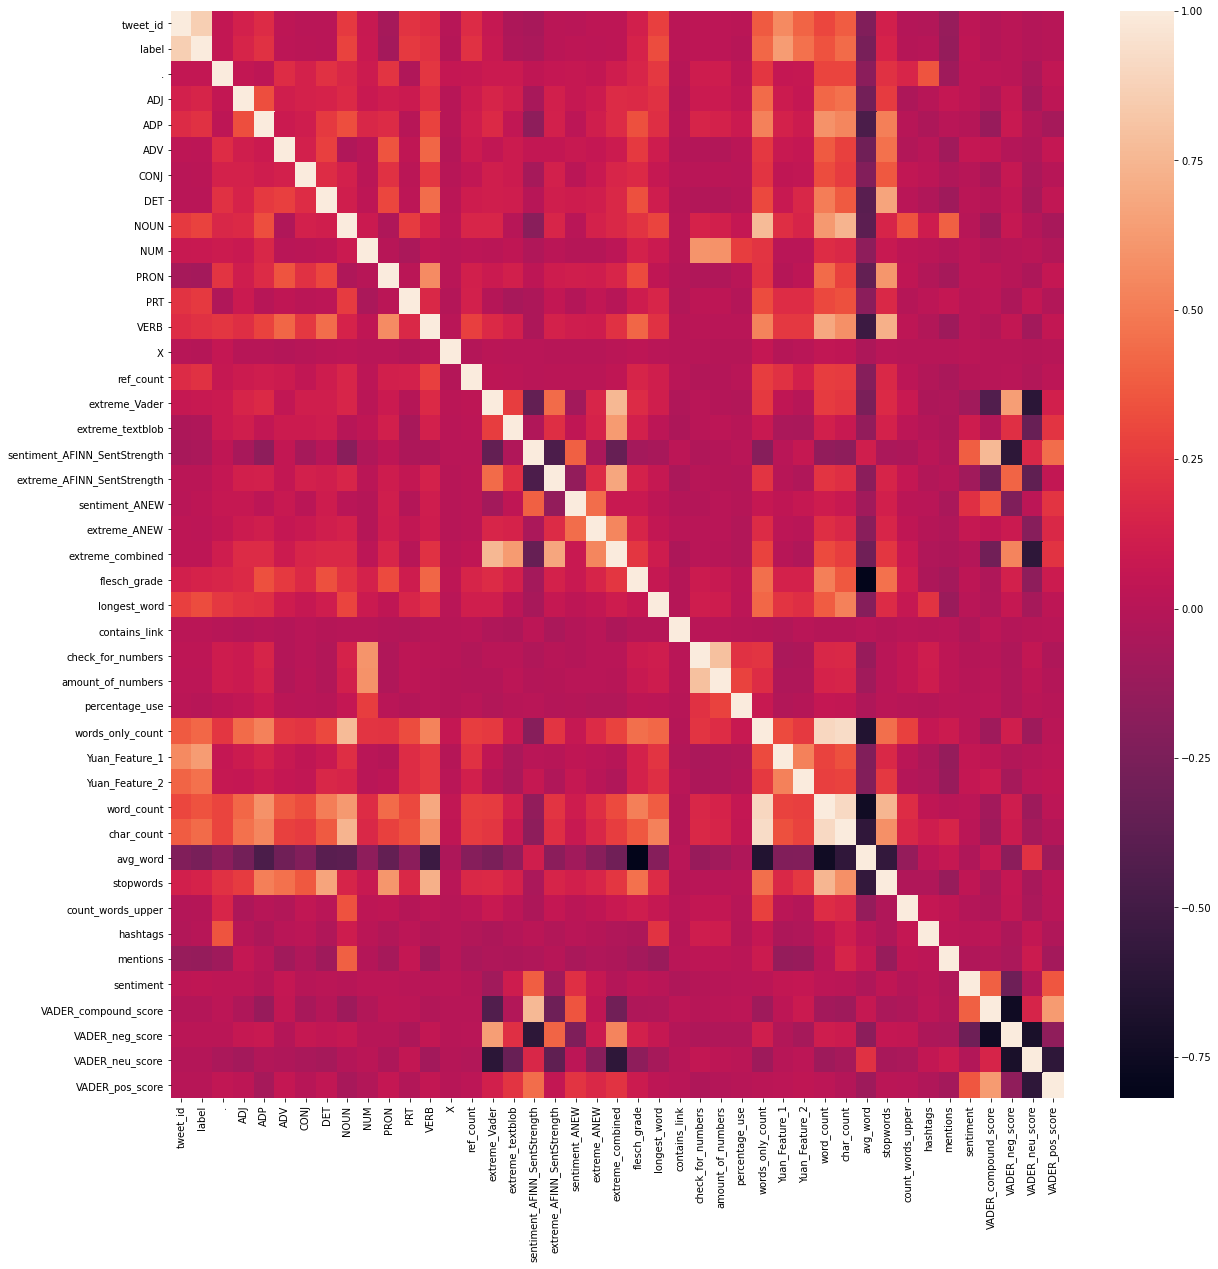

,tweet_id,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
tweet_id,1.000000,0.858524,0.049300,0.131818,0.183616,0.032196,0.010235,0.009300,0.249243,0.071988,...,-0.223885,0.119890,-0.009282,-0.018897,-0.130775,0.027235,-0.011062,0.015689,-0.012125,-0.000853
label,0.858524,1.000000,0.054379,0.148885,0.212769,0.024539,0.017959,0.009788,0.288332,0.082889,...,-0.258089,0.144978,-0.004050,-0.001690,-0.140412,0.038871,-0.010295,0.016418,-0.012252,-0.001487
.,0.049300,0.054379,1.000000,0.053587,0.029328,0.196350,0.138555,0.212214,0.163405,0.095969,...,-0.185198,0.214091,0.157916,0.351028,-0.095623,0.031512,0.023703,0.015881,-0.045693,0.044830
ADJ,0.131818,0.148885,0.053587,1.000000,0.326365,0.112904,0.133771,0.144748,0.177536,0.083180,...,-0.279613,0.255521,-0.040536,0.003752,0.057264,0.028559,-0.037394,0.065523,-0.076832,0.032304
ADP,0.183616,0.212769,0.029328,0.326365,1.000000,0.086542,0.106271,0.248621,0.329428,0.167974,...,-0.457326,0.514020,0.000798,-0.041176,0.011623,-0.005674,-0.128772,0.082020,-0.017935,-0.066572
ADV,0.032196,0.024539,0.196350,0.112904,0.086542,1.000000,0.131395,0.270057,-0.027365,0.010931,...,-0.299518,0.453786,-0.016571,0.008206,-0.087512,0.061021,0.052572,-0.013602,-0.033693,0.061176
CONJ,0.010235,0.017959,0.138555,0.133771,0.106271,0.131395,1.000000,0.191963,0.132569,0.018019,...,-0.217552,0.364907,0.041455,0.024914,-0.024119,0.001732,-0.061872,0.067658,-0.057841,0.003959
DET,0.009300,0.009788,0.212214,0.144748,0.248621,0.270057,0.191963,1.000000,0.112185,0.029702,...,-0.397882,0.667822,0.007004,-0.027246,-0.095512,0.016759,-0.006125,0.045214,-0.071027,0.046930
NOUN,0.249243,0.288332,0.163405,0.177536,0.329428,-0.027365,0.132569,0.112185,1.000000,0.088216,...,-0.381706,0.151500,0.346222,0.099246,0.389254,0.000080,-0.106295,0.068823,-0.012655,-0.059112
NUM,0.071988,0.082889,0.095969,0.083180,0.167974,0.010931,0.018019,0.029702,0.088216,1.000000,...,-0.169608,0.073229,0.031610,0.017935,-0.010232,0.019407,-0.021038,0.001230,0.016012,-0.023238


In [64]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(corr_final2, xticklabels=corr_final2.columns, yticklabels=corr_final2.columns, ax=ax)
plt.show()
corr_final2

**What I notice**

When I compare this heatmap to the heatmap of the correlation within the dataset with the RT's included, there is a difference in variables that correlate. The variables seem to, generally, correlate less with the variable 'label' than in the previous heatmap.

In [65]:
X2 = df_ex_RT.loc[:,'.':'VADER_pos_score'] #create the X matrix

y2 = df_ex_RT['label'] #create the y-variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train2.head() #show the head of the training set

,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,...,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
152096,5.0,1.0,1.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,...,8.538462,1,0,0,0,-0.038095,-0.8658,0.492,0.508,0.000
118505,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,9.000000,1,0,0,0,0.000000,0.0000,0.000,1.000,0.000
68453,3.0,1.0,2.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,...,6.111111,3,0,0,0,0.000000,0.0000,0.000,1.000,0.000
13269,4.0,1.0,0.0,1.0,0.0,1.0,8.0,0.0,0.0,4.0,...,7.266667,3,0,0,0,0.100000,0.4404,0.000,0.828,0.172
108451,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,...,20.000000,0,0,0,0,0.000000,0.0000,0.000,1.000,0.000


In [66]:
knn2 = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn2 = knn2.fit(X_train2, y_train2) #this fits the k-nearest neigbor model with the train data

### Evaluating the model again

In [67]:
knn2.score(X_test2, y_test2) #calculate the fit on the *test* data

0.7861952861952862

The accuracy, now ±79% is a less than with the retweets included. 

In [68]:
y_test_pred2 = knn2.predict(X_test2) #the predicted values
cm2 = confusion_matrix(y_test2, y_test_pred2) #creates a "confusion matrix"
cm2

array([[3615,  968],
       [ 683, 2456]])

Just to make sure the classes are the same as in the previous model, I will use the .classes_ function.

In [69]:
knn2.classes_

array([0, 1])

The classes are still the same. Now, let's make a readable table out of it.

In [70]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix2 = pd.DataFrame(cm2, index=['Real', 'Fake'], columns = ['Real_p', 'Fake_p']) 
conf_matrix2

,Real_p,Fake_p
Real,3615,968
Fake,683,2456


The matrix shows that of the fake tweets, 2456 are correctly predicted to be fake. 683 fake tweets are incorrectly predicted as 'real'. 

The recall and precision for the category 'fake' is:

$recall = \frac{2456}{2456 + 683} = .967$

$precision = \frac{2456}{2456 + 968} = .717$

### Quick check

Just to check we are going to calculate the accuracy (eventhough we already did that with the .score method).

**Accuracy**

In [71]:
(3615+2456)/(3615+968+683+2456)

0.7861952861952862

The accuracy is correct. It's about 79%.

**precision (fake tweets)**

The precision in this case is the number of correctly predicted fake tweets, devided by the total number of predicted fake tweets. 

In [72]:
2456/(2456+968)

0.7172897196261683

The precision is ±72%.

**Recall (fake tweets)**

This is the number of correctly predicted fake tweets, divided by the total number of actual tweets. 

In [73]:
2456/(2456+683)

0.7824147817776362

The recall is ±78%.

### Parameter setting

Just like in the previous model, I will print out a classification report that shows us the outcome of recall, precision and accuracy with different settings for parameter k.

In [74]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn2_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn2_new = knn2_new.fit(X_train2, y_train2) #fit new model on train data
    y_test_pred_new2 = knn2_new.predict(X_test2) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test2, y_test_pred_new2)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4583
           1       0.72      0.77      0.74      3139

    accuracy                           0.78      7722
   macro avg       0.78      0.78      0.78      7722
weighted avg       0.79      0.78      0.78      7722

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      4583
           1       0.80      0.64      0.71      3139

    accuracy                           0.79      7722
   macro avg       0.79      0.76      0.77      7722
weighted avg       0.79      0.79      0.78      7722

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4583
           1       0.72      0.79      0.75      3139

    accuracy                           0.79      7722
   macro avg       0.78      0.7

The ideal neighbour is seems to be 3. However, the outcomes are quite similar.

### References

Al-Ash, H. S., & Wibowo, W. C. (2018). Fake News Identification Characteristics Using Named Entity Recognition and Phrase Detection. 2018 10th International Conference on Information Technology and Electrical Engineering (ICITEE), 12–17. https://doi.org/10.1109/iciteed.2018.8534898

Chong, M. (2019). Discovering fake news embedded in the opposing hashtag activism networks on Twitter: #Gunreformnow vs. #NRA. Open Information Science, 3(1), 137–153. https://doi.org/10.1515/opis-2019-0010

Espinosa, M. S., Centeno, R., & Rodrigo, Á. (2020). Analyzing User Profiles for Detection of Fake News Spreaders on Twitter. CLEF, 1–12. Retrieved from https://www.semanticscholar.org/paper/Analyzing-User-Profiles-for-Detection-of-Fake-News-Espinosa-Centeno/fca5272fd0dba0b3db6ed286cb16c5476f516e01

Pandey, P. (2020, September 11). Simplifying Sentiment Analysis using VADER in Python (on Social Media Text). Retrieved from https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

Robb, A. (2014, April 17). How Capital Letters Became Internet Code for Yelling. Retrieved from https://newrepublic.com/article/117390/netiquette-capitalization-how-caps-became-code-yelling

Schott, M. (2020, February 27). K-Nearest Neighbors (KNN) Algorithm for Machine Learning. Retrieved from https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26

TextBlob. (n.d.). TextBlob: Simplified Text Processing — TextBlob 0.16.0 documentation. Retrieved from https://textblob.readthedocs.io/en/dev/

Zhang, Z. (2016). Introduction to machine learning: k-nearest neighbors. Annals of Translational Medicine, 4(11), 218. https://doi.org/10.21037/atm.2016.03.37